In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
house=pd.read_csv('housedata.csv')

In [21]:
house.head()

,Area,Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [15]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 2600 to 4200
Data columns (total 1 columns):
Price    6 non-null int64
dtypes: int64(1)
memory usage: 96.0 bytes


In [18]:
house.describe()

,Price
count,6.000000
mean,646600.000000
std,83905.661311
min,550000.000000
25%,576250.000000
50%,645000.000000
75%,713750.000000
max,749600.000000


In [22]:
house.isnull()

,Area,Price
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False


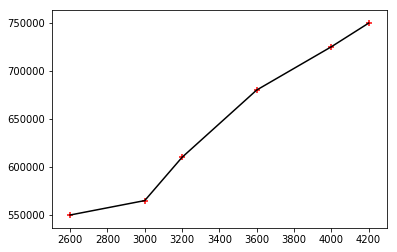

In [28]:
plt.plot(house.Area,house.Price,color='black')
plt.scatter(house.Area,house.Price,color='red',marker='+')

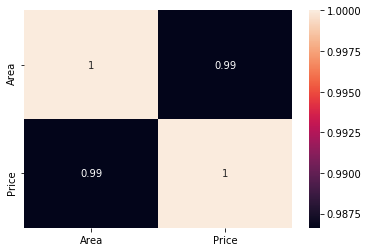

In [32]:
sns.heatmap(house.corr(),annot=True)

C:\Users\MY pc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


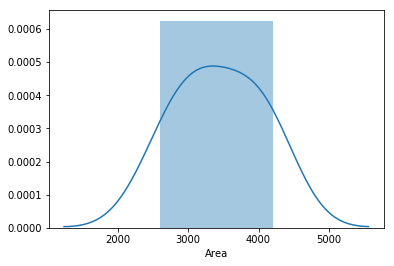

In [33]:
sns.distplot(house['Area'])

In [34]:
from sklearn.model_selection import train_test_split

In [37]:
X=house[['Area']]
y=house['Price']


In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [39]:
X_test

,Area
0,2600
4,4000


In [40]:
y_test

0    550000
4    725000
Name: Price, dtype: int64

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lm=LinearRegression()

In [60]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
lm.intercept_

121066.6666666664

In [47]:
lm.coef_

array([151.45238095])

In [62]:
pred=lm.predict(X_test)

In [63]:
pred

array([514842.85714286, 726876.19047619])

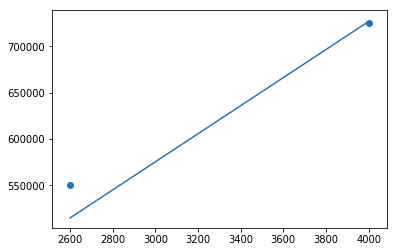

In [59]:
plt.plot(X_test,pred)
plt.scatter(X_test,y_test)

In [64]:
#remove test varaible we get the actual parameters


In [65]:
#checking accuracy
from sklearn import metrics

In [67]:
metrics.mean_absolute_error(y_test,pred)

18516.666666666744

In [68]:
metrics.mean_squared_error(y_test,pred)

619772392.290253

In [70]:
np.sqrt(metrics.mean_squared_error(y_test,pred))

24895.22830363789

In [74]:
from sklearn.metrics import r2_score

In [75]:
r2_score(y_test,pred)

0.9190501365171915